In [110]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit

## Model

In [232]:
def SDF_freqscan(f, A, t, T):
    #A: detemined by the strength of the SDF, t: the pulse length of the SDF in one cycle, T: the pulse length of the MW pulse
    delta = 2*np.pi*f
    return (1-np.exp(-8*A**2*np.sin(delta*t/2)**2*np.sin(delta*(t+T)/2)**2/delta**2)*np.cos(4*A**2*np.sin(delta*t/2)**2/delta**2*np.sin(delta*(t+T))))/2

def symmetric_SDF(f, A, t, T):
    #A: detemined by the strength of the SDF, t: the pulse length of the SDF in one cycle, T: the pulse length of the MW pulse
    delta = 2*np.pi*f
    return (1-np.exp(-32*A**2*np.sin(delta*t/2)**2*np.sin(delta*(t+T)/2)**2/delta**2))/2

def symmetric_SDF_noecho(f, A, t):
    #A: detemined by the strength of the SDF, t: the pulse length of the SDF in one cycle, T: the pulse length of the MW pulse
    delta = 2*np.pi*f
    return (1-np.exp(-8*A**2*np.sin(delta*t/2)**2/delta**2))/2

In [250]:
A = 0.02
t = 100
T = 30
f = np.linspace(-0.02, 0.02, 1000)

In [252]:
b_pop = SDF_freqscan(f, A, t, T)
b_pop_sym = symmetric_SDF(f, A, t, T)
b_pop_noecho = symmetric_SDF_noecho(f, A, t)

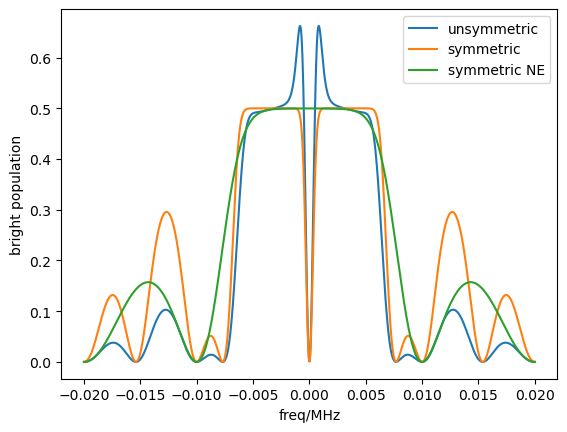

In [254]:
plt.plot(f, b_pop, label='unsymmetric')
plt.plot(f, b_pop_sym, label='symmetric')
plt.plot(f, b_pop_noecho, label='symmetric NE')
plt.xlabel("freq/MHz")
plt.ylabel("bright population")
plt.legend()

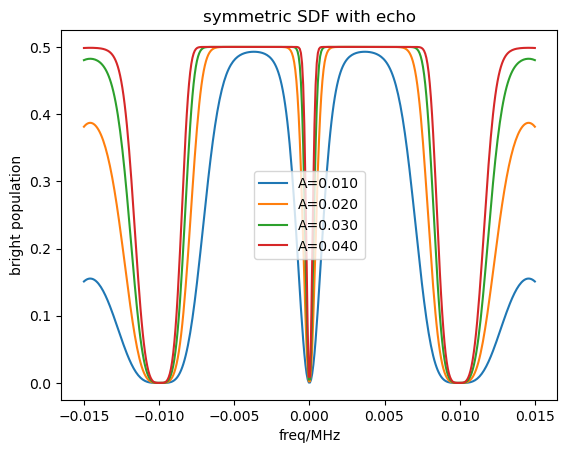

In [291]:
for A in np.linspace(0.01, 0.04, 4):
    t = 100
    T = 1
    f = np.linspace(-0.015, 0.015, 400)
    b_pop_sym = symmetric_SDF(f, A, t, T)
    plt.plot(f, b_pop_sym, label='A=%.3f'%A)

plt.title("symmetric SDF with echo")
plt.xlabel("freq/MHz")
plt.ylabel("bright population")
plt.legend()

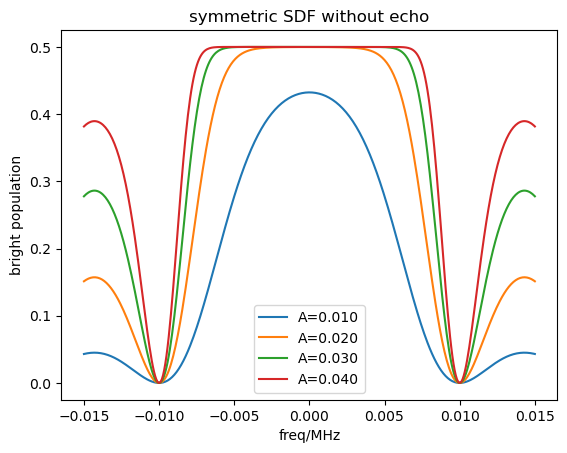

In [266]:
for A in np.linspace(0.01, 0.04, 4):
    t = 100
    # T = 30
    f = np.linspace(-0.015, 0.015, 400)
    b_pop_sym = symmetric_SDF_noecho(f, A, t)
    plt.plot(f, b_pop_sym, label='A=%.3f'%A)

plt.title("symmetric SDF without echo")
plt.xlabel("freq/MHz")
plt.ylabel("bright population")
plt.legend()

## import data and fit

In [104]:
filename = "C:\\jupyter\\data\\LS_gate_freq_-0.010-0.010-21-04-24.csv"

In [106]:
data0 = []
data1 = []
datafreq = []

with open(filename, 'r') as f:
    rows = csv.reader(f)
    for row in rows:
        datafreq.append(float(row[0]))
        data0.append(float(row[1]))
        data1.append(float(row[2]))

In [152]:
def SDF_freqscanfit(f, f0, A, t, T):
    #A: detemined by the strength of the SDF, t: the pulse length of the SDF in one cycle, T: the pulse length of the MW pulse
    delta = 2*np.pi*(f-f0)
    sinc_sd = np.sinc(delta*t/2/np.pi)*t/2/np.pi
    
    return (1-np.exp(-8*A**2*sinc_sd**2*np.sin(delta*(t+T)/2)**2)*np.cos(4*A**2*sinc_sd**2*np.sin(delta*(t+T))))/2

In [178]:
popt, pcov = curve_fit(SDF_freqscanfit, datafreq, data0, p0=[-0.002, 0.02, 100, 30], bounds=([-0.005, 0, 50, 30], [0.005, 0.05, 150, 31]))

In [180]:
popt

array([-7.99474649e-04,  5.00000000e-02,  1.06839802e+02,  3.00000000e+01])

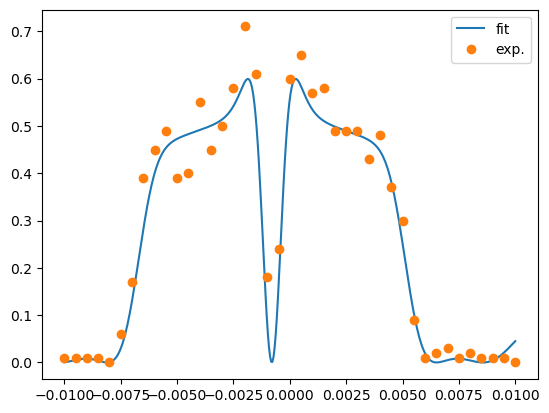

In [182]:
f_fit = np.linspace(np.min(datafreq), np.max(datafreq), 400)
plt.plot(f_fit, SDF_freqscanfit(f_fit, *popt), '-', label='fit')
plt.plot(datafreq, data0, 'o', label='exp.')
plt.legend()